In [7]:

# Calculate Abnormal Return

import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm

# 读取文档
df = pd.read_csv('/Users/jiayuncao/Desktop/Finance/Qfinancedata/s_dq_close.csv', encoding='utf-8')

#时间区间定位2005-01-04到2017-12-01
df2 = df.loc[(df['trade_days'] >= '2005-01-04')&(df['trade_days'] <= '2017-12-01'),:].reset_index(drop=True)

#导入指数
df3 = pd.read_csv("/Users/jiayuncao/Desktop/Finance/Qfinancedata/sh000300.csv", encoding='utf-8')
df3 = df3.rename(columns={'date':'trade_days'})
df3 = df3.rename(columns={'close':'sh000300'})

# 变成时间
df3['trade_days'] = pd.to_datetime(df3['trade_days'], format='%Y-%m-%d')
df3 = df3.loc[(df3['trade_days'] >= '2005-01-04')&(df3['trade_days'] <= '2017-12-01'),:].reset_index(drop=True)



In [8]:
#数据格式转化
# df4 = df2.melt(id_vars=['trade_days'])
# df4 = df4.rename(columns={'variable':'ticker'})
# df4 = df4.rename(columns={'value':'price'})

# 选择股票
df4 = df2[['trade_days','000656.SZ']]
df4.head()

# Change the date string to a date variable
df4['trade_days'] = pd.to_datetime(df4['trade_days'], format='%Y-%m-%d')


/Users/jiayuncao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [9]:

# # Change the date string to a date variable
# df4['trade_days'] = pd.to_datetime(df4['trade_days'], format='%Y-%m-%d')
# df4 = df4.sort_values(by=['ticker', 'trade_days']).reset_index(drop=True)

#合并数据
df5 = df4.merge(df3, on=['trade_days'], how='left')
df5.head()



,trade_days,000656.SZ,symbol,open,high,low,sh000300,volume,turnover
0,2005-01-04,2.95,SH000300,994.76,994.76,980.65,982.79,741286900,4.431976e+09
1,2005-01-05,3.10,SH000300,981.57,997.32,979.87,992.56,711910900,4.529207e+09
2,2005-01-06,3.14,SH000300,993.33,993.78,980.33,983.17,628802800,3.921015e+09
3,2005-01-07,3.19,SH000300,983.04,995.71,979.81,983.95,729869400,4.737468e+09
4,2005-01-10,3.24,SH000300,983.76,993.95,979.78,993.87,579169700,3.762931e+09


In [11]:
# to_numeric
df5['000656.SZ'] = pd.to_numeric(df5['000656.SZ'])
df5['sh000300'] = pd.to_numeric(df5['sh000300'])
df5.head()

,trade_days,000656.SZ,symbol,open,high,low,sh000300,volume,turnover
0,2005-01-04,2.95,SH000300,994.76,994.76,980.65,982.79,741286900,4.431976e+09
1,2005-01-05,3.10,SH000300,981.57,997.32,979.87,992.56,711910900,4.529207e+09
2,2005-01-06,3.14,SH000300,993.33,993.78,980.33,983.17,628802800,3.921015e+09
3,2005-01-07,3.19,SH000300,983.04,995.71,979.81,983.95,729869400,4.737468e+09
4,2005-01-10,3.24,SH000300,983.76,993.95,979.78,993.87,579169700,3.762931e+09


In [17]:
df5['stock_pct'] = df5['000656.SZ'].pct_change(periods=90, fill_method=None, limit=None, freq=None)
df5['index_pct'] = df5['sh000300'].pct_change(periods=90, fill_method=None, limit=None, freq=None)
df5.dropna(subset=['stock_pct'], inplace=True)
df5.head()

,trade_days,000656.SZ,symbol,open,high,low,sh000300,volume,turnover,stock_pct,index_pct
90,2005-05-26,2.11,SH000300,867.75,872.83,854.95,857.33,662278600,3.470051e+09,-0.284746,-0.127657
91,2005-05-27,2.13,SH000300,855.59,864.96,848.39,849.50,774998300,4.240677e+09,-0.312903,-0.144132
92,2005-05-30,2.23,SH000300,847.63,858.46,842.10,855.61,697158300,3.712115e+09,-0.289809,-0.129744
93,2005-05-31,2.23,SH000300,856.56,863.19,853.29,855.94,704782100,3.601006e+09,-0.300940,-0.130098
94,2005-06-01,2.34,SH000300,855.20,857.65,836.04,837.53,790230200,4.274074e+09,-0.277778,-0.157304


In [19]:
# AR
df5['AR'] = df5['stock_pct'] - df5['index_pct']
df5.head()

,trade_days,000656.SZ,symbol,open,high,low,sh000300,volume,turnover,stock_pct,index_pct,AR
90,2005-05-26,2.11,SH000300,867.75,872.83,854.95,857.33,662278600,3.470051e+09,-0.284746,-0.127657,-0.157089
91,2005-05-27,2.13,SH000300,855.59,864.96,848.39,849.50,774998300,4.240677e+09,-0.312903,-0.144132,-0.168771
92,2005-05-30,2.23,SH000300,847.63,858.46,842.10,855.61,697158300,3.712115e+09,-0.289809,-0.129744,-0.160065
93,2005-05-31,2.23,SH000300,856.56,863.19,853.29,855.94,704782100,3.601006e+09,-0.300940,-0.130098,-0.170842
94,2005-06-01,2.34,SH000300,855.20,857.65,836.04,837.53,790230200,4.274074e+09,-0.277778,-0.157304,-0.120474


In [21]:
# 涨跌guo
df5['涨跌'] = ''
# col6 = df5.iloc[:,6]

df5.loc[df5.AR>0, '涨跌'] = "过涨"
df5.loc[df5.AR<0, '涨跌'] = "过跌"
df5.loc[df5.AR==0, '涨跌'] = "平"
df5.head()

,trade_days,000656.SZ,symbol,open,high,low,sh000300,volume,turnover,stock_pct,index_pct,AR,涨跌
90,2005-05-26,2.11,SH000300,867.75,872.83,854.95,857.33,662278600,3.470051e+09,-0.284746,-0.127657,-0.157089,过跌
91,2005-05-27,2.13,SH000300,855.59,864.96,848.39,849.50,774998300,4.240677e+09,-0.312903,-0.144132,-0.168771,过跌
92,2005-05-30,2.23,SH000300,847.63,858.46,842.10,855.61,697158300,3.712115e+09,-0.289809,-0.129744,-0.160065,过跌
93,2005-05-31,2.23,SH000300,856.56,863.19,853.29,855.94,704782100,3.601006e+09,-0.300940,-0.130098,-0.170842,过跌
94,2005-06-01,2.34,SH000300,855.20,857.65,836.04,837.53,790230200,4.274074e+09,-0.277778,-0.157304,-0.120474,过跌


In [24]:
# 筛选有用的columns
df6=df5[['trade_days','000656.SZ','sh000300','stock_pct','index_pct','AR','涨跌']]
df6.head()

,trade_days,000656.SZ,sh000300,stock_pct,index_pct,AR,涨跌
90,2005-05-26,2.11,857.33,-0.284746,-0.127657,-0.157089,过跌
91,2005-05-27,2.13,849.50,-0.312903,-0.144132,-0.168771,过跌
92,2005-05-30,2.23,855.61,-0.289809,-0.129744,-0.160065,过跌
93,2005-05-31,2.23,855.94,-0.300940,-0.130098,-0.170842,过跌
94,2005-06-01,2.34,837.53,-0.277778,-0.157304,-0.120474,过跌


In [29]:
# 较大的abnormal return
df7=df6[(df6['AR']>0.3)|(df6['AR']<0.3) ]
pd.set_option('display.max_rows', 500)
df7.head(100)

,trade_days,000656.SZ,sh000300,stock_pct,index_pct,AR,涨跌
90,2005-05-26,2.11,857.33,-0.284746,-0.127657,-0.157089,过跌
91,2005-05-27,2.13,849.50,-0.312903,-0.144132,-0.168771,过跌
92,2005-05-30,2.23,855.61,-0.289809,-0.129744,-0.160065,过跌
93,2005-05-31,2.23,855.94,-0.300940,-0.130098,-0.170842,过跌
94,2005-06-01,2.34,837.53,-0.277778,-0.157304,-0.120474,过跌
95,2005-06-02,2.22,818.37,-0.314815,-0.179275,-0.135540,过跌
96,2005-06-03,2.18,818.03,-0.327160,-0.179295,-0.147866,过跌
97,2005-06-06,2.13,838.99,-0.332288,-0.158376,-0.173913,过跌
98,2005-06-07,2.12,837.28,-0.333333,-0.152808,-0.180525,过跌
99,2005-06-08,2.22,905.77,-0.288462,-0.063755,-0.224706,过跌


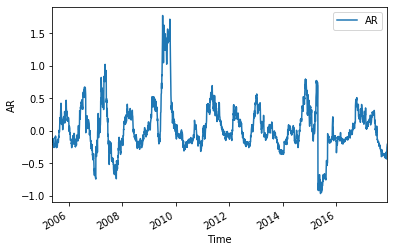

In [32]:
ax = plt.gca()
df7.plot(kind='line', x='trade_days', y='AR', ax=ax)
plt.xlabel('Time')
plt.ylabel('AR')
plt.show()